In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Overview
The dataset comprises customer demographics, account specifics, service subscriptions, payment methods, and churn status. The target variable is `Churn`, a binary indicator of whether a customer has discontinued their service. The following visualizations are designed to identify which binary features significantly influence a customer's decision to churn.

In [21]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape) 
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [ ]:
for x in ['Contract', 'InternetService', 'PaymentMethod','gender','SeniorCitizen']:
      print(df.groupby(x)['Churn'].value_counts())

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: count, dtype: int64
InternetService  Churn
DSL              No       1957
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1407
                 Yes       113
Name: count, dtype: int64
PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
Name: count, dtype: int64
gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: count, dtype: int64
SeniorCitizen  Churn
0

### EDA & Visualization

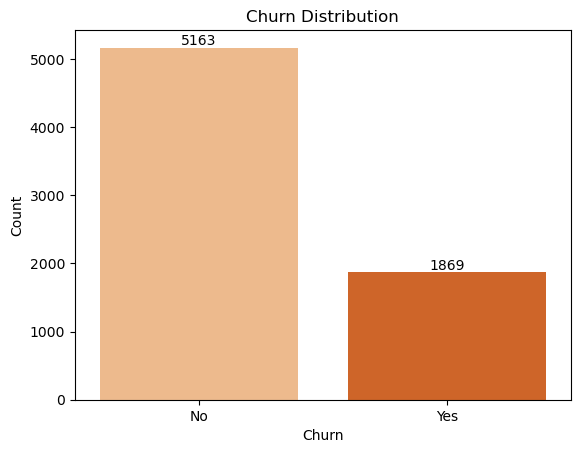

In [ ]:

ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='Oranges')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

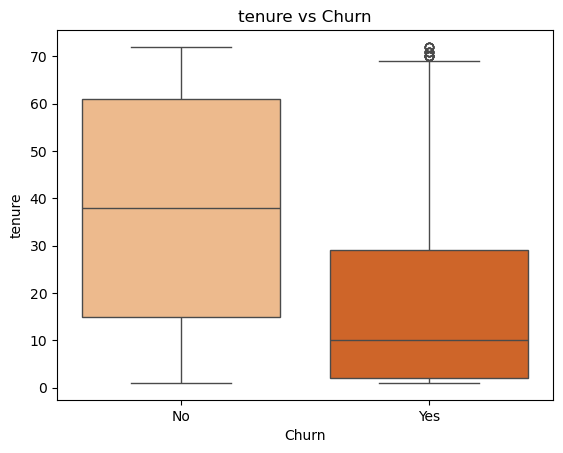

In [ ]:
sns.boxplot(data=df, x='Churn', y='tenure',palette='Oranges',hue='Churn')
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.title('tenure vs Churn')
plt.show()

-> Customers with lower tenure are significantly more likely to churn, the most frequent happened during the early stages of the customer lifecycle (first 0–30 months).

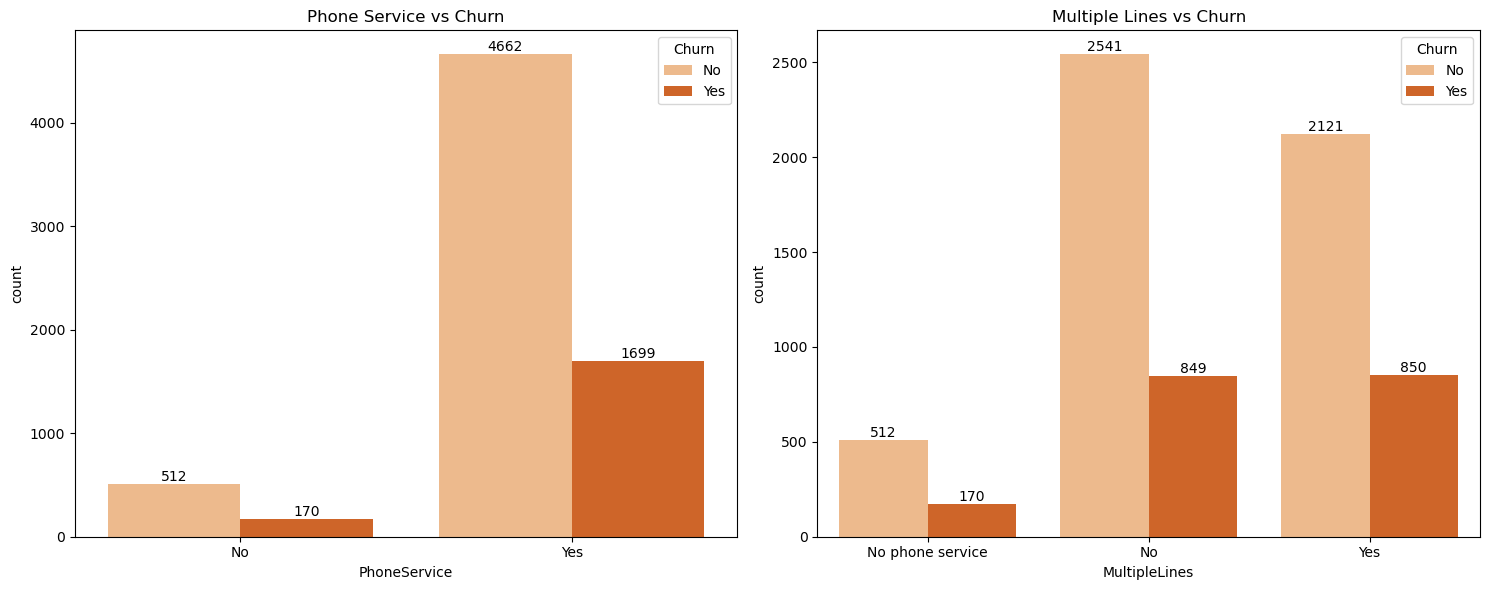

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='PhoneService', hue='Churn', palette='Oranges', ax=ax[0])
ax[0].set_title('Phone Service vs Churn')
for c in ax[0].containers: 
    ax[0].bar_label(c)

sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='Oranges', ax=ax[1])
ax[1].set_title('Multiple Lines vs Churn')
for c in ax[1].containers: 
    ax[1].bar_label(c)

plt.tight_layout()
plt.show()

-> Phone service and phone line service (Single vs. Multiple lines) show no significant correlation with churn behavior.

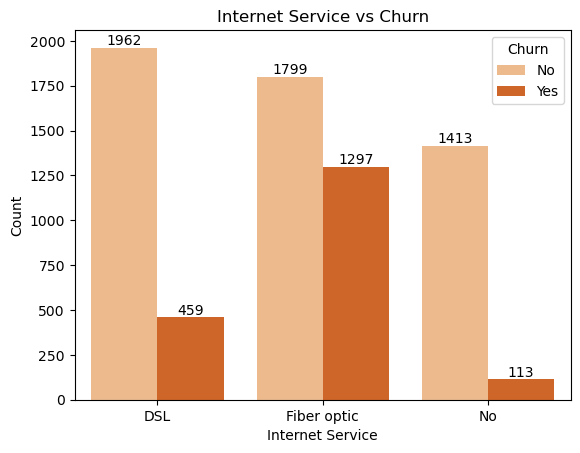

In [ ]:
ax = sns.countplot(data=df, x='InternetService', hue='Churn', palette='Oranges')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count') 
plt.show()

-> Fiber optic customers are a significant driver of churn.

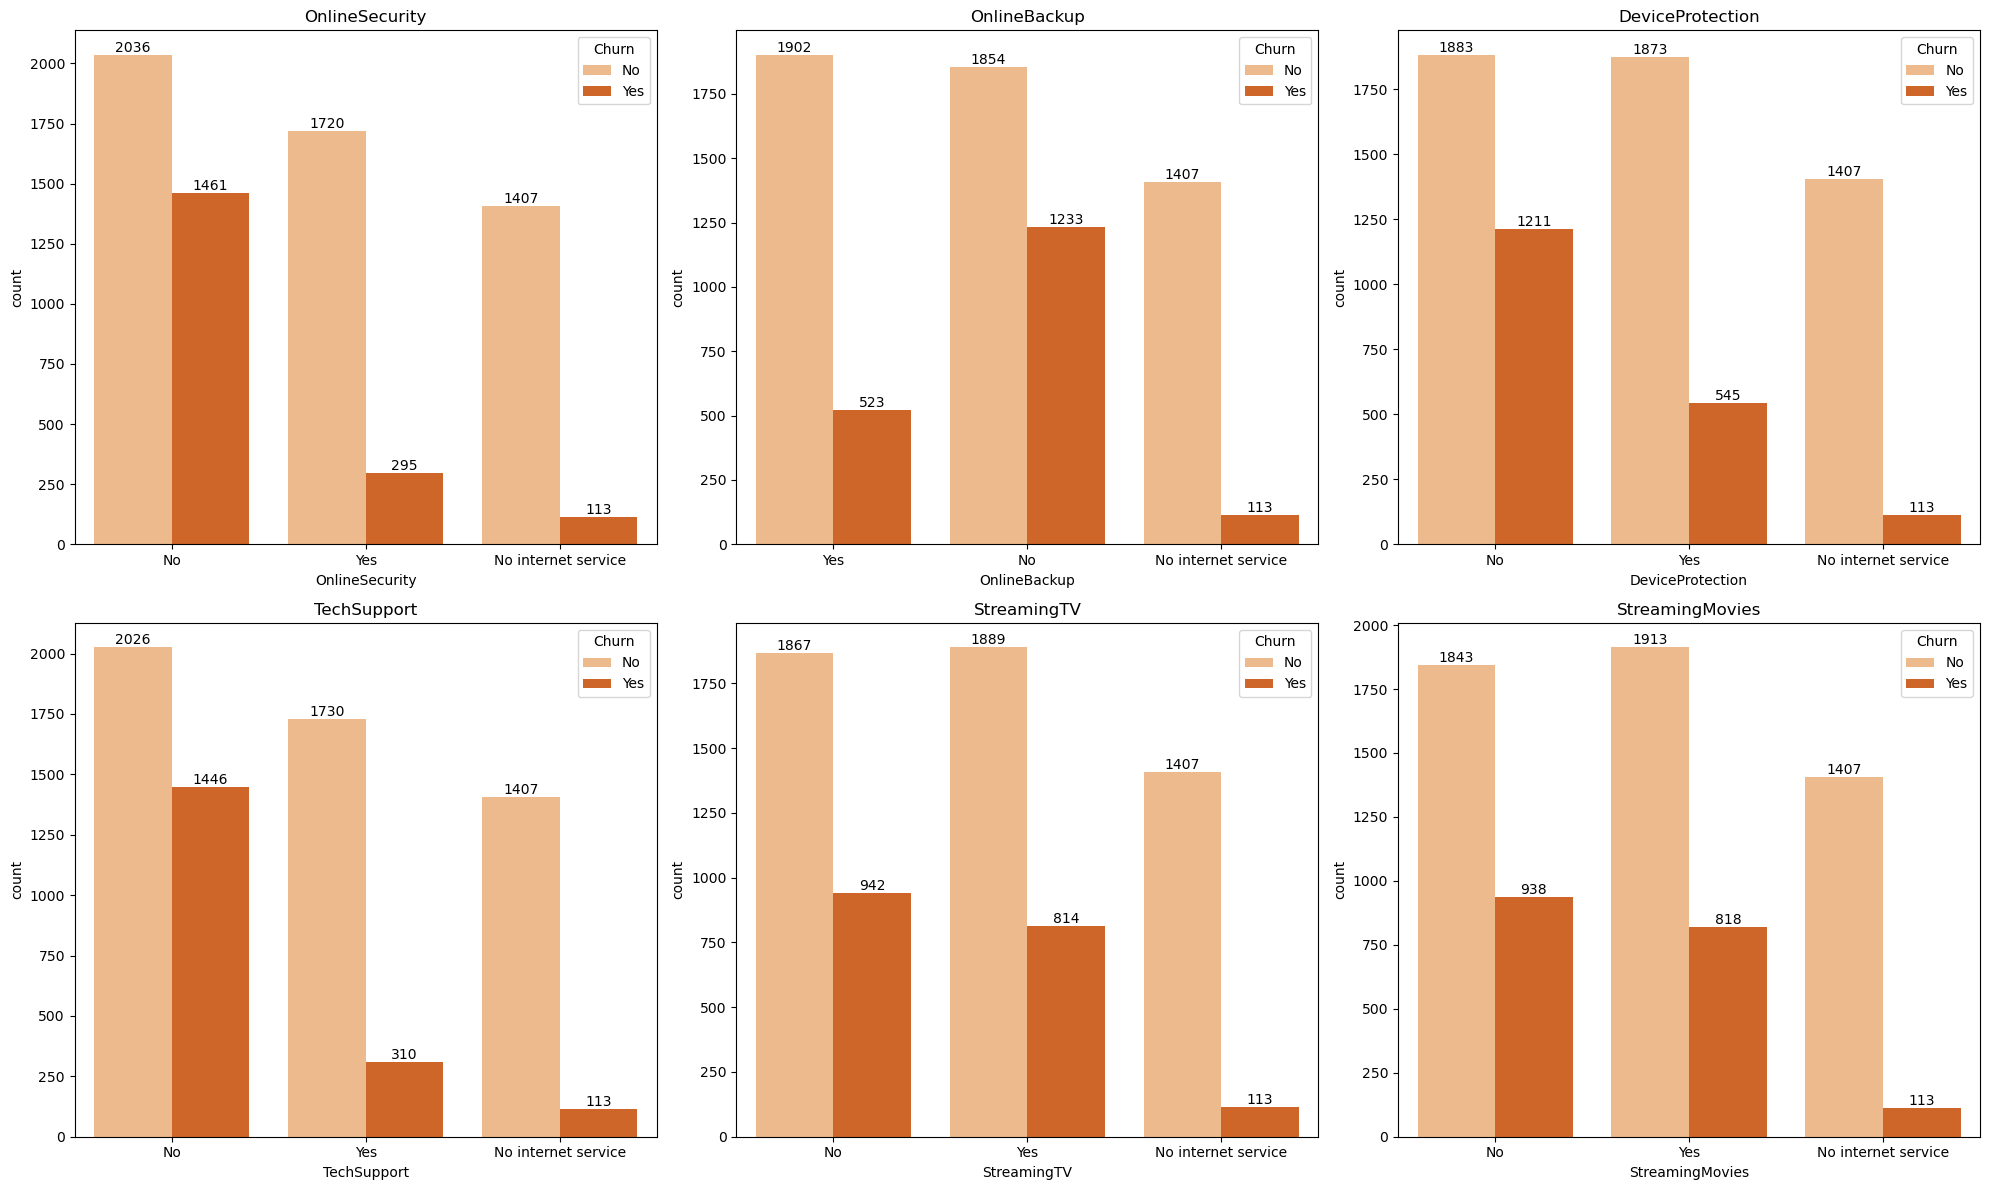

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 12))

sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='Oranges', ax=ax[0, 0])
ax[0, 0].set_title('OnlineSecurity')
for c in ax[0, 0].containers: ax[0, 0].bar_label(c)

sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette='Oranges', ax=ax[0, 1])
ax[0, 1].set_title('OnlineBackup')
for c in ax[0, 1].containers: ax[0, 1].bar_label(c)

sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette='Oranges', ax=ax[0, 2])
ax[0, 2].set_title('DeviceProtection')
for c in ax[0, 2].containers: ax[0, 2].bar_label(c)

sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Oranges', ax=ax[1, 0])
ax[1, 0].set_title('TechSupport')
for c in ax[1, 0].containers: ax[1, 0].bar_label(c)

sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='Oranges', ax=ax[1, 1])
ax[1, 1].set_title('StreamingTV')
for c in ax[1, 1].containers: ax[1, 1].bar_label(c)

sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='Oranges', ax=ax[1, 2])
ax[1, 2].set_title('StreamingMovies')
for c in ax[1, 2].containers: ax[1, 2].bar_label(c)

plt.tight_layout()
plt.show()

-> Customers who do not subscribe to security and support add-ons (OnlineSecurity and TechSupport) exhibit a significantly higher churn volume, suggesting that these services play a crucial role in enhancing customer retention. 

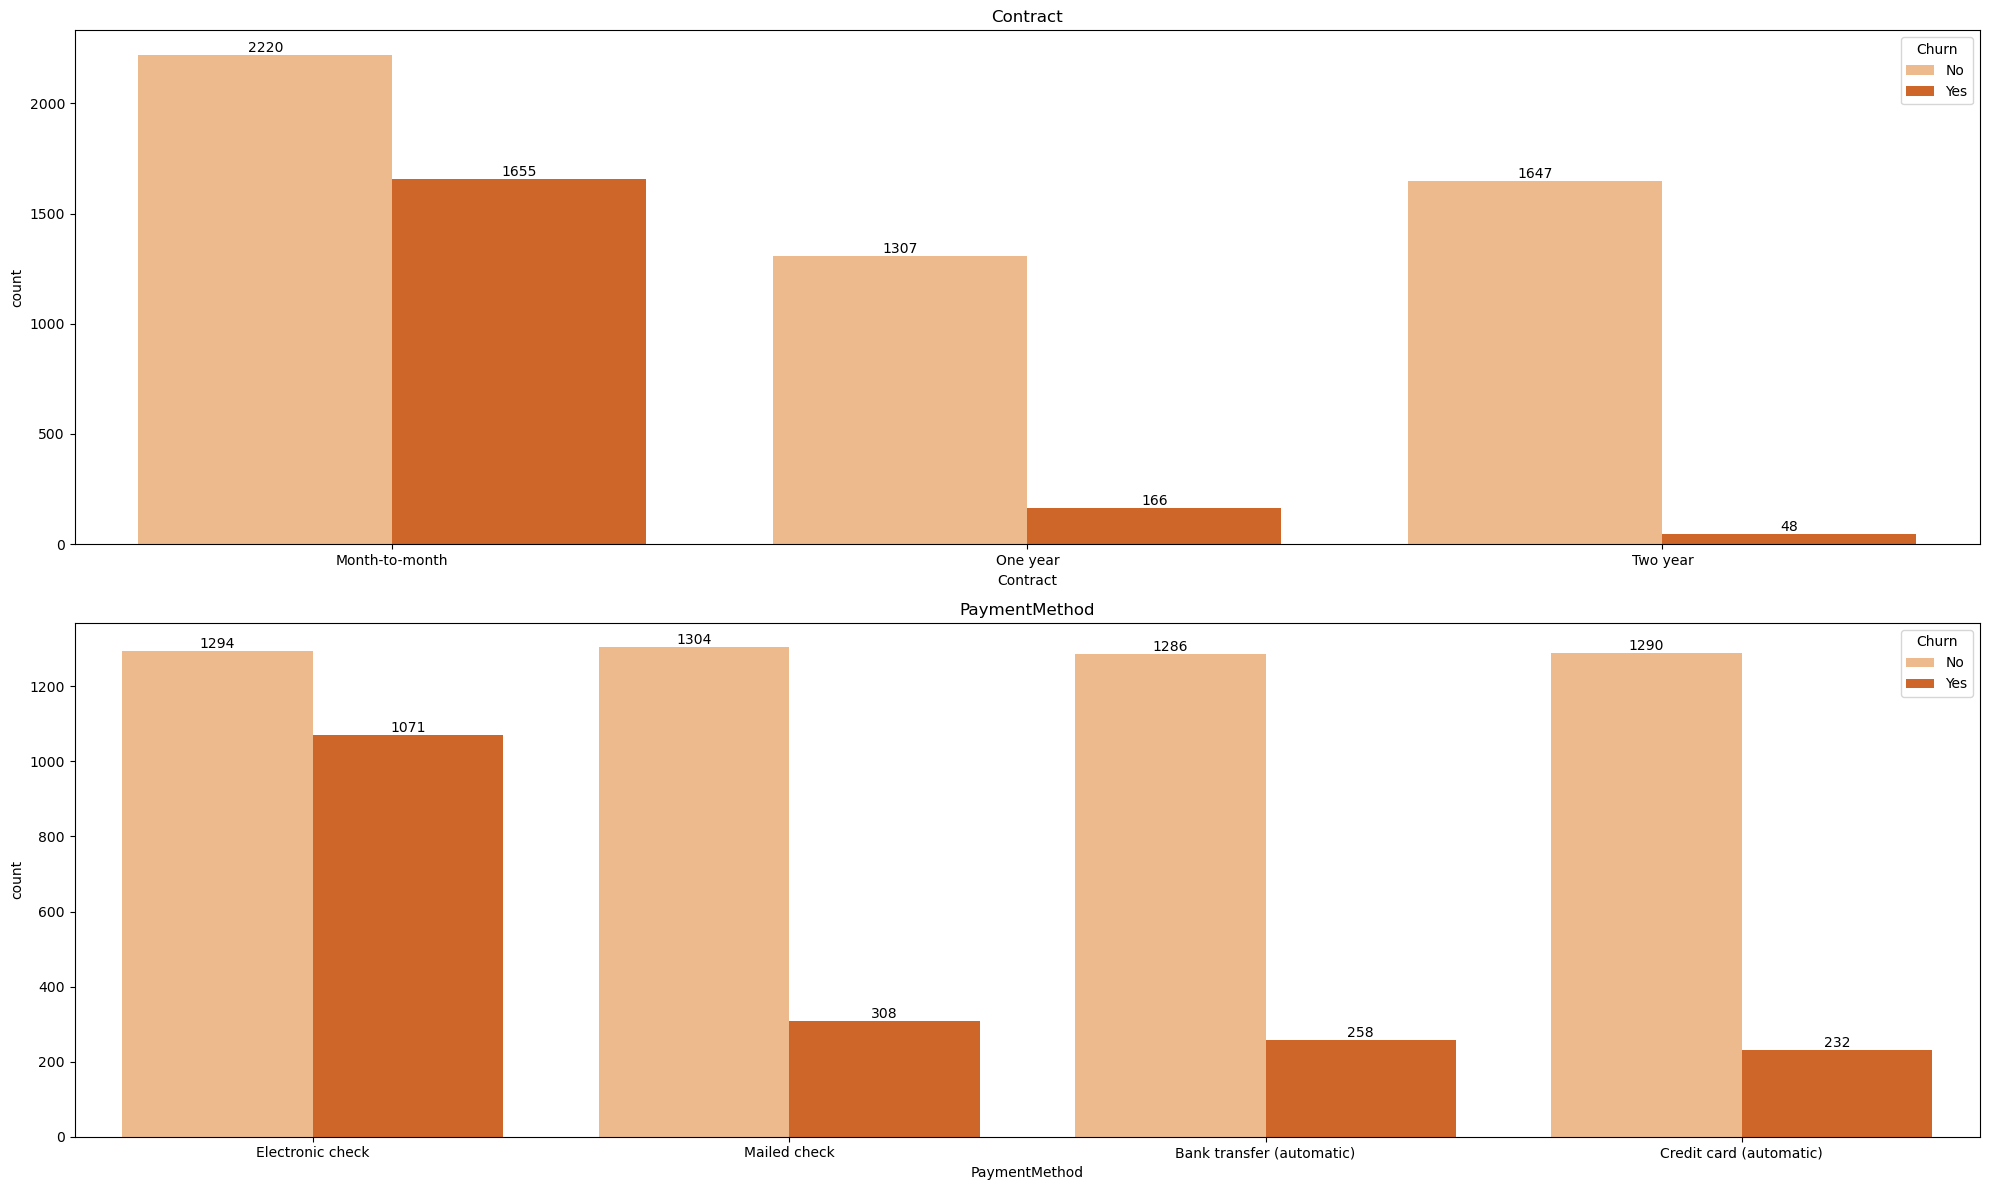

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(20, 12))

sns.countplot(data=df, x='Contract', hue='Churn', palette='Oranges', ax=ax[0])
ax[0].set_title('Contract')
for c in ax[0].containers: 
    ax[0].bar_label(c)

sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Oranges', ax=ax[1])
ax[1].set_title('PaymentMethod')
for c in ax[1].containers: 
    ax[1].bar_label(c)

plt.tight_layout()
plt.show()

-> Customers on Month-to-month contracts are the absolute highest risk group, with a massive churn volume (1,655) compared to One-year and Two-year contracts. Electronic Check (1,071) payment method is the primary churn, with 1,071 churned customers—more than triple the attrition volume of any other payment category. 

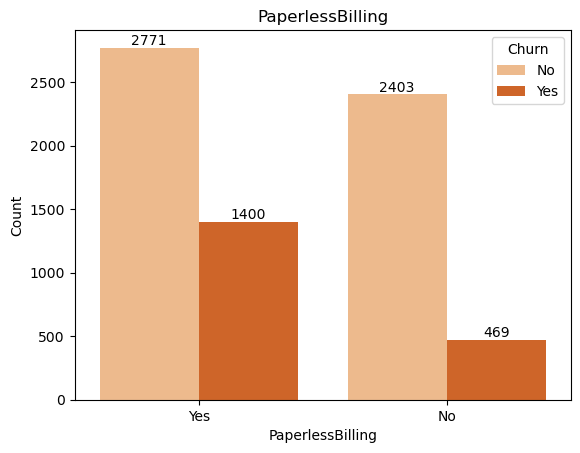

In [ ]:
ax = sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='Oranges')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.title('PaperlessBilling')
plt.show()

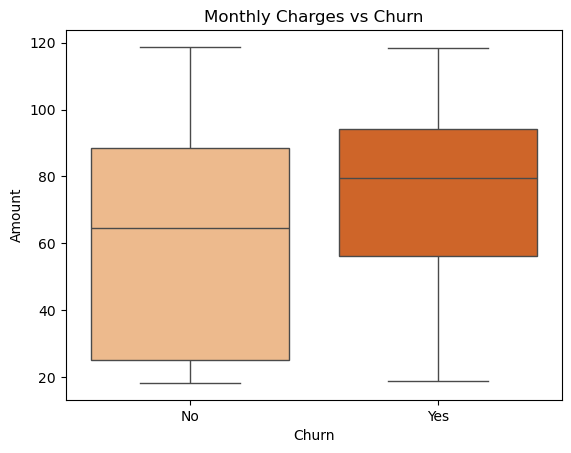

In [ ]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges',palette='Oranges',hue='Churn')
plt.xlabel('Churn')
plt.ylabel('Amount')
plt.title('Monthly Charges vs Churn')
plt.show()

-> Churn is heavily concentrated among high-value customers, as those who leave typically pay higher monthly fees (median ~$80) compared to retained customers (median ~$65).

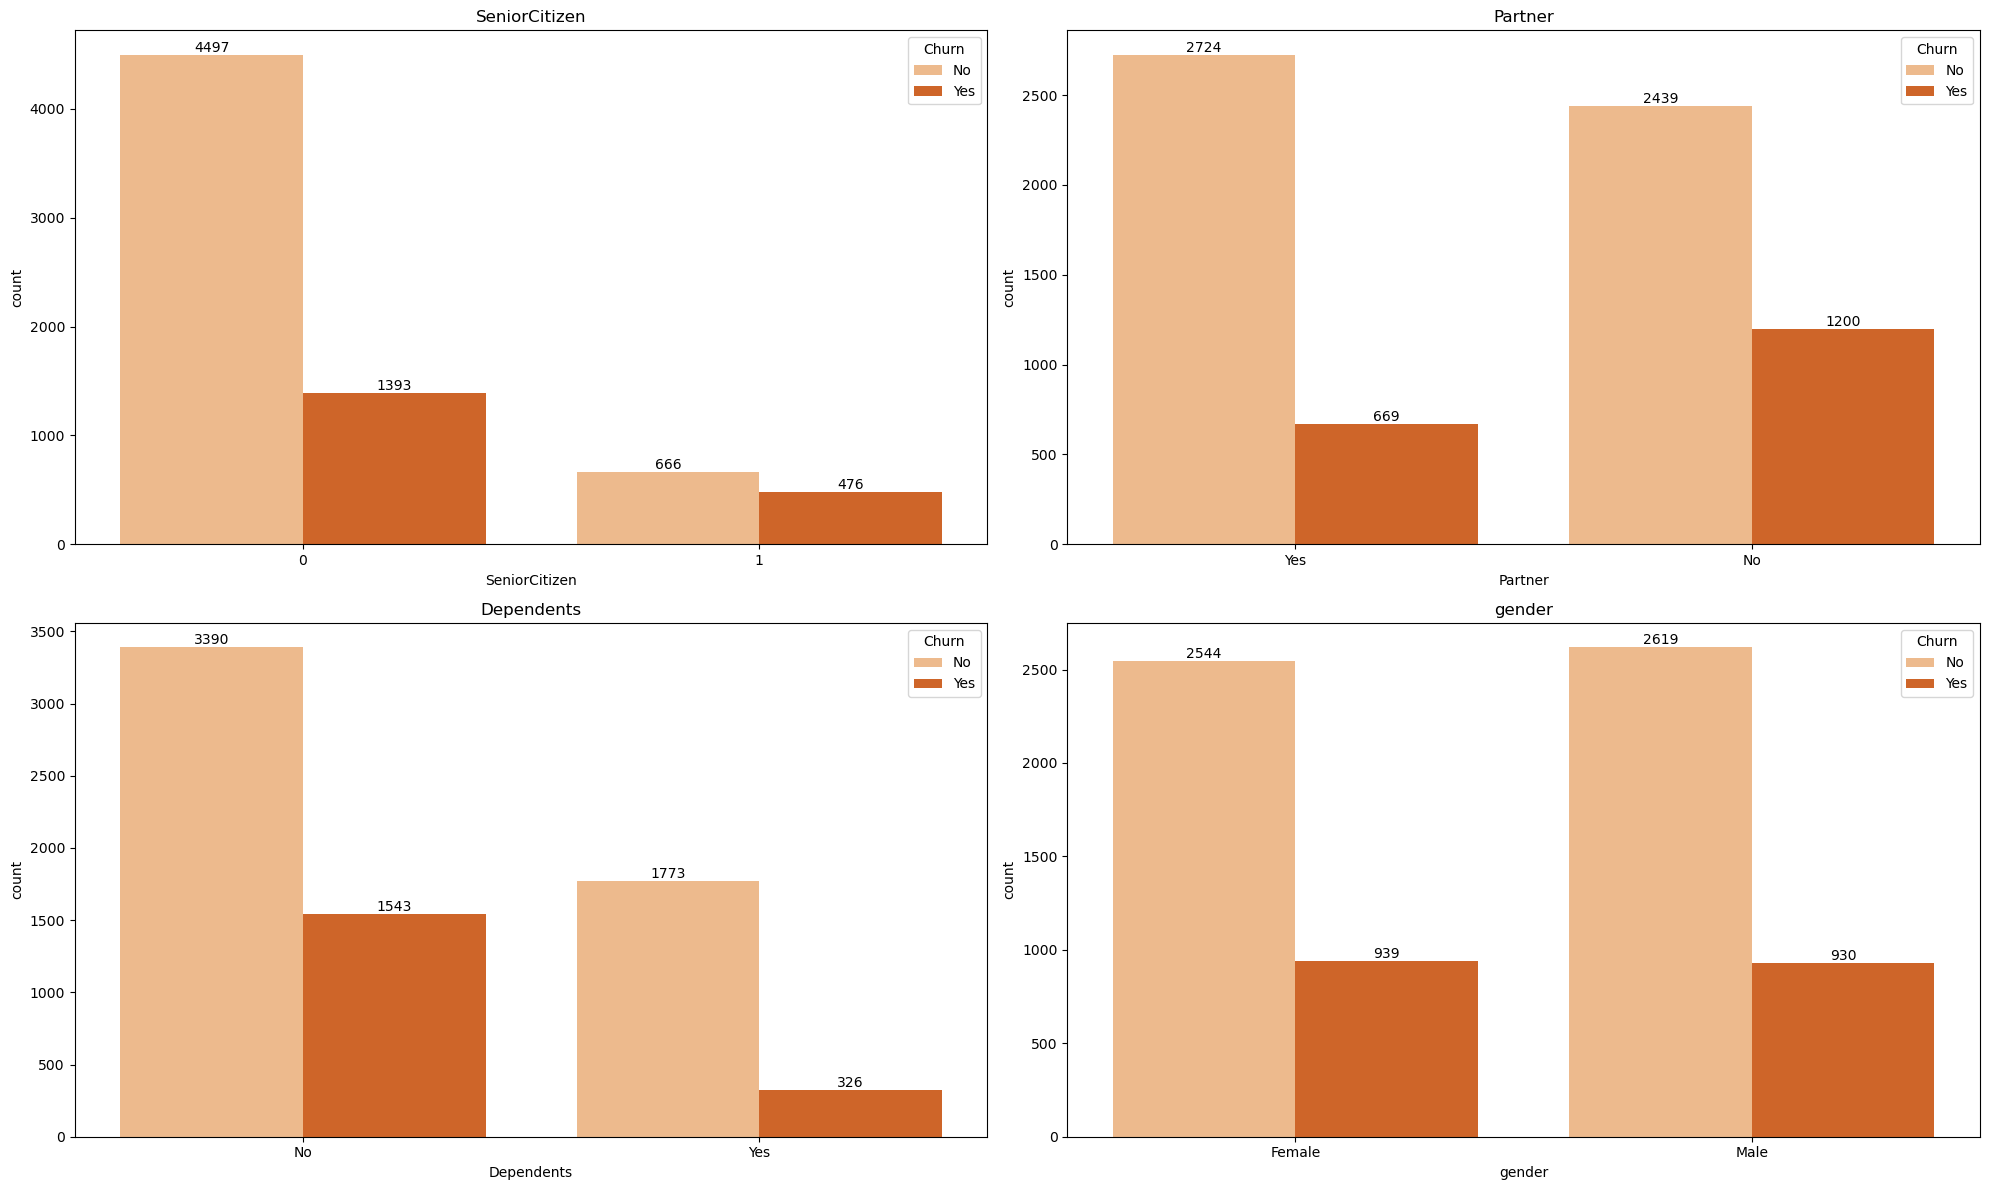

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Oranges', ax=ax[0, 0])
ax[0, 0].set_title('SeniorCitizen')
for c in ax[0, 0].containers: ax[0, 0].bar_label(c)

sns.countplot(data=df, x='Partner', hue='Churn', palette='Oranges', ax=ax[0, 1])
ax[0, 1].set_title('Partner')
for c in ax[0, 1].containers: ax[0, 1].bar_label(c)

sns.countplot(data=df, x='Dependents', hue='Churn', palette='Oranges', ax=ax[1, 0])
ax[1, 0].set_title('Dependents')
for c in ax[1, 0].containers: ax[1, 0].bar_label(c)

sns.countplot(data=df, x='gender', hue='Churn', palette='Oranges', ax=ax[1, 1])
ax[1, 1].set_title('gender')
for c in ax[1, 1].containers: ax[1, 1].bar_label(c)

plt.tight_layout()
plt.show()

-> Churn is most prevalent among customers with fewer social or familial ties, specifically those without partners or dependents, while gender shows no significant impact on attrition.

### Key Insights
**Tenure**: New customers are the most vulnerable, specifically within the first 20 months of service.

**Service & Value**: Fiber optic users are primary churn drivers, typically associated with high monthly charges (Median ~$80).

**Add-on Services**: A lack of add-ons services like OnlineSecurity and TechSupport strongly correlates with higher churn volumes.

**Contract**: Month-to-month contract status is the primary driver influencing a customer's decision to leave the service.

**Payment Method**: Electronic Check is a critical risk factor, accounting for over 1,071 churners, triple the volume of any other payment method.

**Demographics**: Customers with no partners or dependents show significantly higher attrition rates, while gender is a neutral factor.

### Data Processing & Feature Selection
Based on key insights, the following steps are recommended for the modeling phase:

**Categorical Feature Selection**: To optimize the prediction model, focusing on encoding the following high-impact categorical variables:

- InternetService (Priority: Fiber optic)

- Contract (Priority: Month-to-month)

- PaymentMethod (Priority: Electronic check)

- OnlineSecurity / TechSupport (Binary indicators for "No" service)

- Partner / Dependents (Social tie indicators)

**Encoding Strategy**:

- Apply Label Encoding or Mapping for binary features (e.g. Partner, Dependents, Churn).

- Apply One-Hot Encoding for multi-class categorical features like InternetService, Contract and PaymentMethod to capture the specific risk of Fiber Optic and Electronic Checks without implying a numerical order.

**Numerical Handling**: Tenure and MonthlyCharges should be kept as continuous variables, though binning Tenure into "Early Stage" (0-20 months) could provide additional predictive power.

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

`TotalCharges` is formatted as an object type. This need to be converted into a numeric format (float64) and handle any potential "empty strings" that might be causing the issue.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Number of false values in TotalCharges column: {df['TotalCharges'].isnull().sum()}")

Number of false values in TotalCharges column: 11


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df['TotalCharges'].dtype)

float64


In [ ]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int)
print(df['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [ ]:
demo_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in demo_cols:
    df[col] = (df[col] == 'Yes').astype(int)
print(df[demo_cols].head())

   Partner  Dependents  PhoneService  PaperlessBilling
0        1           0             0                 1
1        0           0             1                 0
2        0           0             1                 1
3        0           0             0                 0
4        0           0             1                 1


In [ ]:
multi_feature_cols = [
    'Contract', 'PaymentMethod', 'InternetService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df_encoded = pd.get_dummies(df, columns=multi_feature_cols,drop_first=True,dtype=int)
for col in df_encoded.columns:
    if any(original in col for original in multi_feature_cols):
        print(col)
df_encoded.head()

Contract_One year
Contract_Two year
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
InternetService_Fiber optic
InternetService_No
MultipleLines_No phone service
MultipleLines_Yes
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No internet service
StreamingMovies_Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,1,29.85,29.85,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,Male,0,0,0,2,1,1,53.85,108.15,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,42.30,1840.75,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded['EarlyStage'] = (df_encoded['tenure'] <= 20).astype(int)
print(df_encoded[['tenure', 'EarlyStage']].head())

NameError: name 'df_encoded' is not defined

In [ ]:
cols_to_drop = ['customerID', 'gender']
df_final = df_encoded.drop(columns=cols_to_drop, errors='ignore')
df_final.head()

NameError: name 'df_encoded' is not defined

In [ ]:
df_final.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,EarlyStage
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889,-0.046262,...,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.022458
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448,0.082783,...,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412,-0.317997
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221,0.068368,...,0.023671,0.139812,0.013963,0.139812,0.063268,0.139812,-0.016558,0.139812,-0.039741,-0.140744
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229,0.202570,...,0.360277,-0.039062,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111,-0.841447
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942,-0.002791,...,-0.052312,0.172209,-0.071227,0.172209,-0.096340,0.172209,-0.022574,0.172209,-0.032959,-0.000305
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825,-0.051391,...,0.126735,-0.321013,0.103797,-0.321013,0.037880,-0.321013,0.223841,-0.321013,0.211716,-0.004941
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356,0.004904,...,0.441780,-0.763557,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429,-0.207946
TotalCharges,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324,0.170814,...,0.509226,-0.375223,0.521983,-0.375223,0.431883,-0.375223,0.514973,-0.375223,0.520122,-0.672188
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000,-0.177820,...,-0.082255,-0.227890,-0.066160,-0.227890,-0.164674,-0.227890,0.063228,-0.227890,0.061382,0.318752
Contract_One year,-0.046262,0.082783,0.068368,0.202570,-0.002791,-0.051391,0.004904,0.170814,-0.177820,1.000000,...,0.083722,0.038004,0.102495,0.038004,0.095775,0.038004,0.061612,0.038004,0.064926,-0.257030


### Splitting into Training and Testing Sets
1. Logistic Regression: The Baseline
2. Random Forest Regression
3. Support Vector Machine (SVM)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(df_final[features], df_final['Churn'])
print(clf.predict(new_customer))

NameError: name 'df_final' is not defined